<a href="https://colab.research.google.com/github/Hrithik2212/Foundation-of-Artificial-Intelligence/blob/main/EDA_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Data Wrangling 


In [3]:
import sklearn.datasets as ds 
data = ds.load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
df = pd.DataFrame(data['data'],columns=data['feature_names'] )
df['Species'] = pd.Series(data['target'])
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
Species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [7]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


## 5 Point Analysis
* The Iris dataset doesn't have any null values
* From the qauntiles it can be seen that the Iris dataset doesn't contain any outliers
* All the feature columns are on an eqaul scale and thus feature scalling is not needed 
* The target column is aldreadt encoded (i.e converted from object dtype to int dtype)
* The target column is multiclass as three classes 0 ,1 and 2 are there refering to each Species of Iris namely (Set
* The mean and median of Petal length column has a difference and thus might contain skewness. Similarly Petal Width might also have skewness

In [14]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [18]:
def TIQ_Analyser(df:pd.DataFrame , col:str):
  Q1 = df[col].quantile(0.25)
  Q2 = df[col].quantile(0.5)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1-IQR * 1.5
  upper_limit = Q3+IQR * 1.5
  print("Turkey's InterQauntile Range Outlier analysis")
  print(f'Column Name : {col}')
  print(f"Upper Limit : {upper_limit} | Lower Limit : {low_limit}")
  data = df[df[col] < upper_limit]
  data = df[df[col] > low_limit]
  print(len(data))
  print(f'Number of Outliers is {len(df) - len(data)}')

In [19]:
TIQ_Analyser(df , 'sepal length (cm)')

Turkey's InterQauntile Range Outlier analysis
Column Name : sepal length (cm)
Upper Limit : 8.350000000000001 | Lower Limit : 3.1499999999999986
150
Number of Outliers is 0


In [21]:
TIQ_Analyser(df , 'petal length (cm)')

Turkey's InterQauntile Range Outlier analysis
Column Name : petal length (cm)
Upper Limit : 10.349999999999998 | Lower Limit : -3.649999999999999
150
Number of Outliers is 0


In [22]:
TIQ_Analyser(df , 'petal width (cm)')

Turkey's InterQauntile Range Outlier analysis
Column Name : petal width (cm)
Upper Limit : 4.05 | Lower Limit : -1.95
150
Number of Outliers is 0


In [23]:
TIQ_Analyser(df , 'sepal width (cm)')

Turkey's InterQauntile Range Outlier analysis
Column Name : sepal width (cm)
Upper Limit : 4.05 | Lower Limit : 2.05
149
Number of Outliers is 1


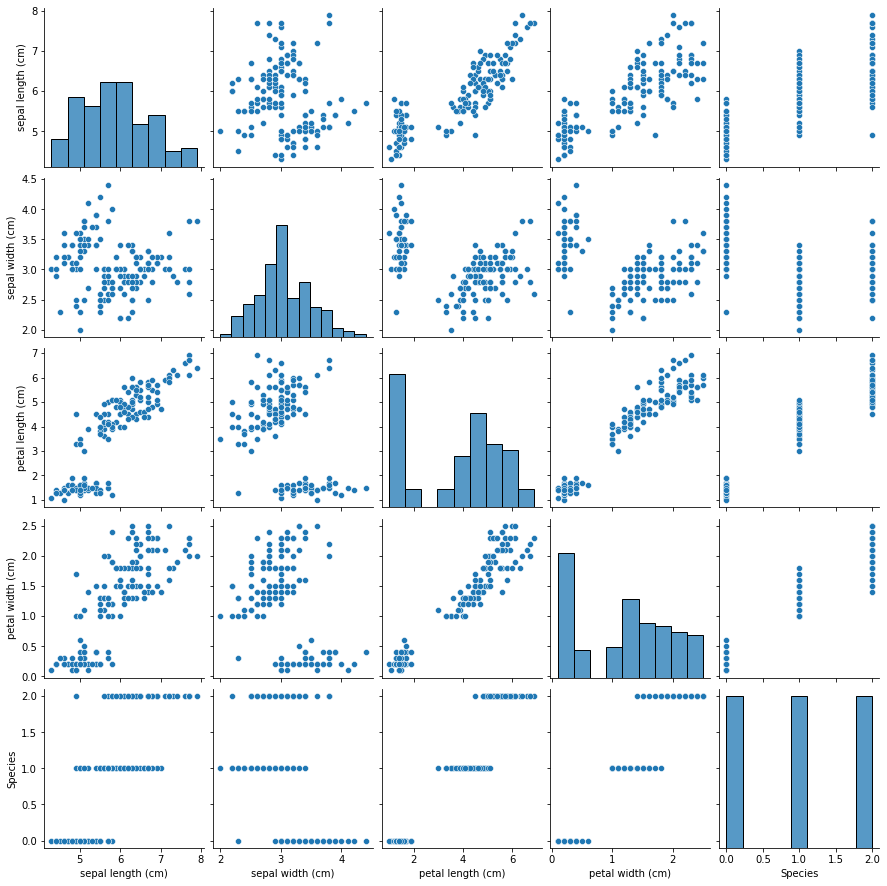

In [31]:
sns.pairplot(df)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


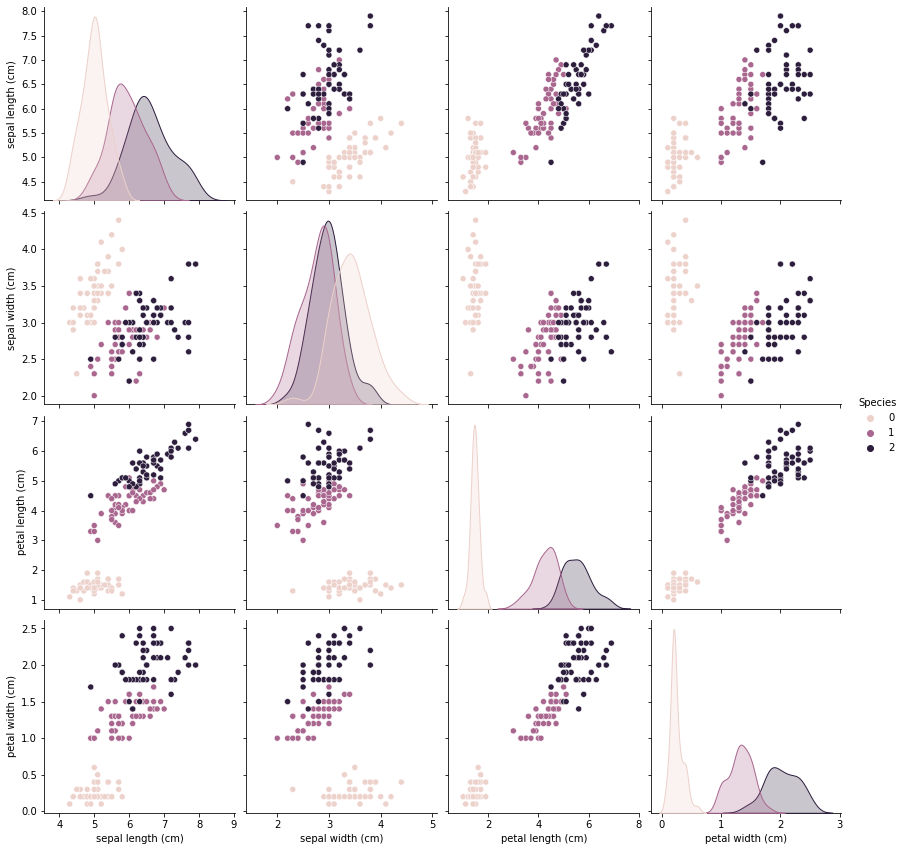

In [27]:
sns.pairplot(df,hue='Species',size=3)

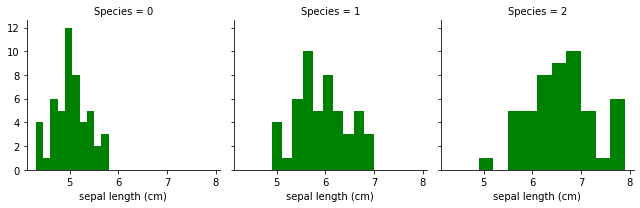

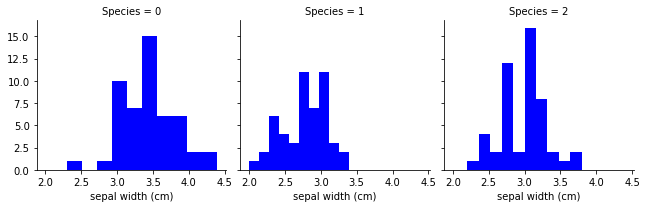

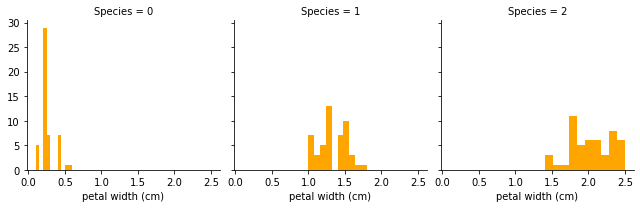

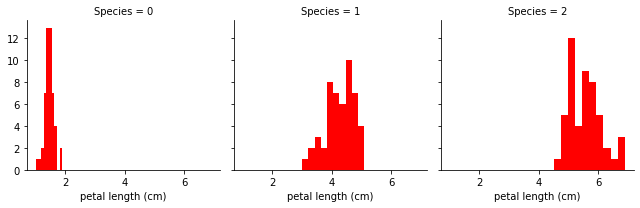

In [30]:
# Seaborn plot , Facet Grid 
plot = sns.FacetGrid(df,
                    col='Species',
                    margin_titles=True)
plot.map(plt.hist,'sepal length (cm)',color='green')

plot = sns.FacetGrid(df,
                      col="Species",
                      margin_titles=True)
plot.map(plt.hist,'sepal width (cm)',
         color='blue')
plot = sns.FacetGrid(df,
                      col="Species",
                      margin_titles=True)
plot.map(plt.hist,'petal width (cm)',
         color='orange')

plot = sns.FacetGrid(df,
                      col="Species",
                      margin_titles=True)
plot.map(plt.hist,'petal length (cm)',
         color='red')

Text(0.5, 1.0, 'Target Distribution')

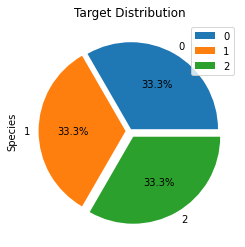

In [43]:
df['Species'].value_counts().plot(kind='pie', autopct='%1.1f%%',explode =[0.025,0.05,0.075],legend=True)
plt.title('Target Distribution')